In [204]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [205]:
df = pd.read_csv("Dataset.csv")
df

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193
...,...,...,...,...,...
495,-1.717106,0.772110,0.117375,-1.134905,-0.795564
496,-0.775524,0.864913,0.670800,-1.384047,-0.524277
497,-1.168657,0.963444,0.422672,-1.461787,-0.579008
498,-0.264773,-1.262000,1.305169,0.567142,1.698487


### Get info bout Data

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   feature_2  500 non-null    float64
 3   feature_3  500 non-null    float64
 4   feature_4  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [207]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-2.344791e-16,-1.314504e-16,5.684342e-16,-1.882938e-16,-2.877698e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.268404e+00,-1.582220e+00,-2.404161e+00,-2.370457e+00,-1.269599e+00
25%,-7.000235e-01,-9.278037e-01,-7.185726e-01,-8.836220e-01,-7.241618e-01
50%,-1.225416e-01,1.318703e-01,2.734487e-01,2.918948e-01,-4.097401e-01
75%,6.630546e-01,9.653978e-01,7.739601e-01,8.173842e-01,6.277492e-01
max,2.161047e+00,1.260191e+00,1.783935e+00,1.947826e+00,2.191764e+00


In [208]:
df.duplicated().sum()

np.int64(0)

# EDA

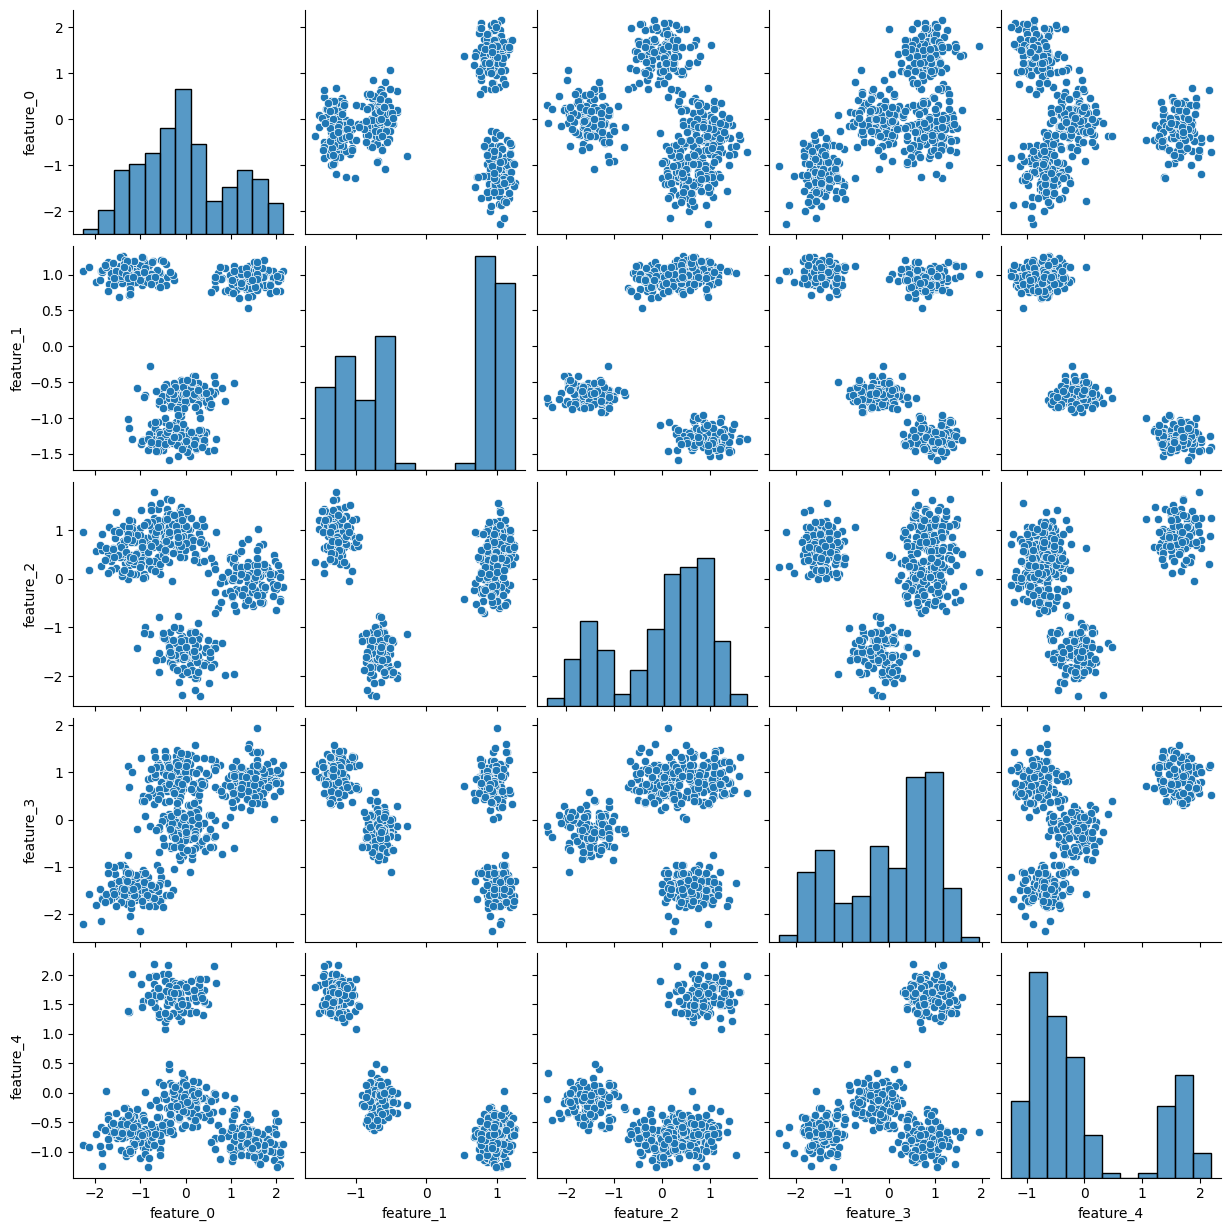

In [209]:
sns.pairplot(data=df)
plt.show()

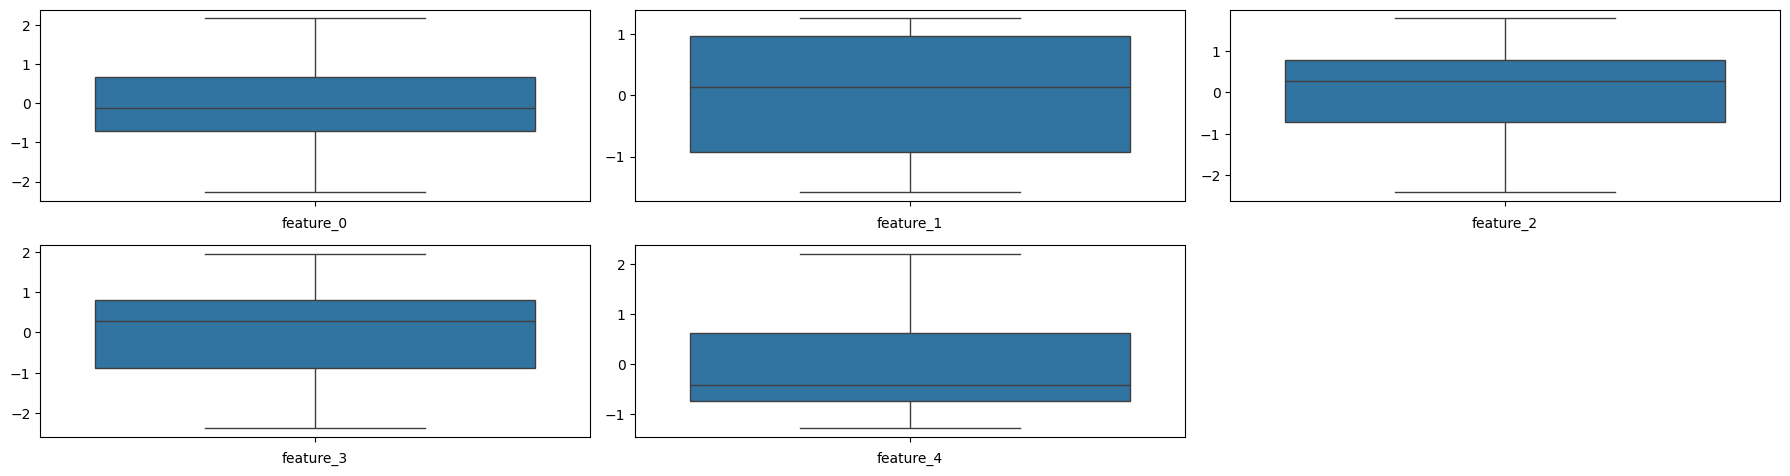

In [210]:
plt.figure(figsize=(18,14))
for index,column in enumerate(df.columns,start=1):
    plt.subplot(6,3,index)
    sns.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel("")

plt.tight_layout()
plt.show()

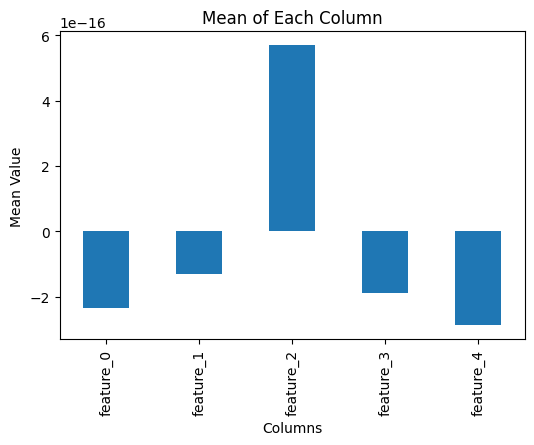

In [211]:
means = df.mean()
plt.figure(figsize=(6,4))
means.plot(kind="bar")   
plt.title("Mean of Each Column")
plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.show()


# Features Correlation 

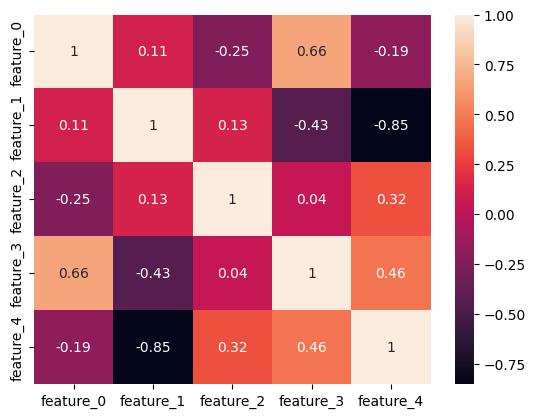

In [212]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# Elbow Method to choose the number of Clusters

In [213]:
from sklearn.cluster import KMeans 

sentroids = []
for k in range(3,31):
    algo = KMeans(n_clusters=k,random_state=42)
    algo.fit(df[["feature_2","feature_3","feature_4"]])
    sentroids.append(algo.inertia_)

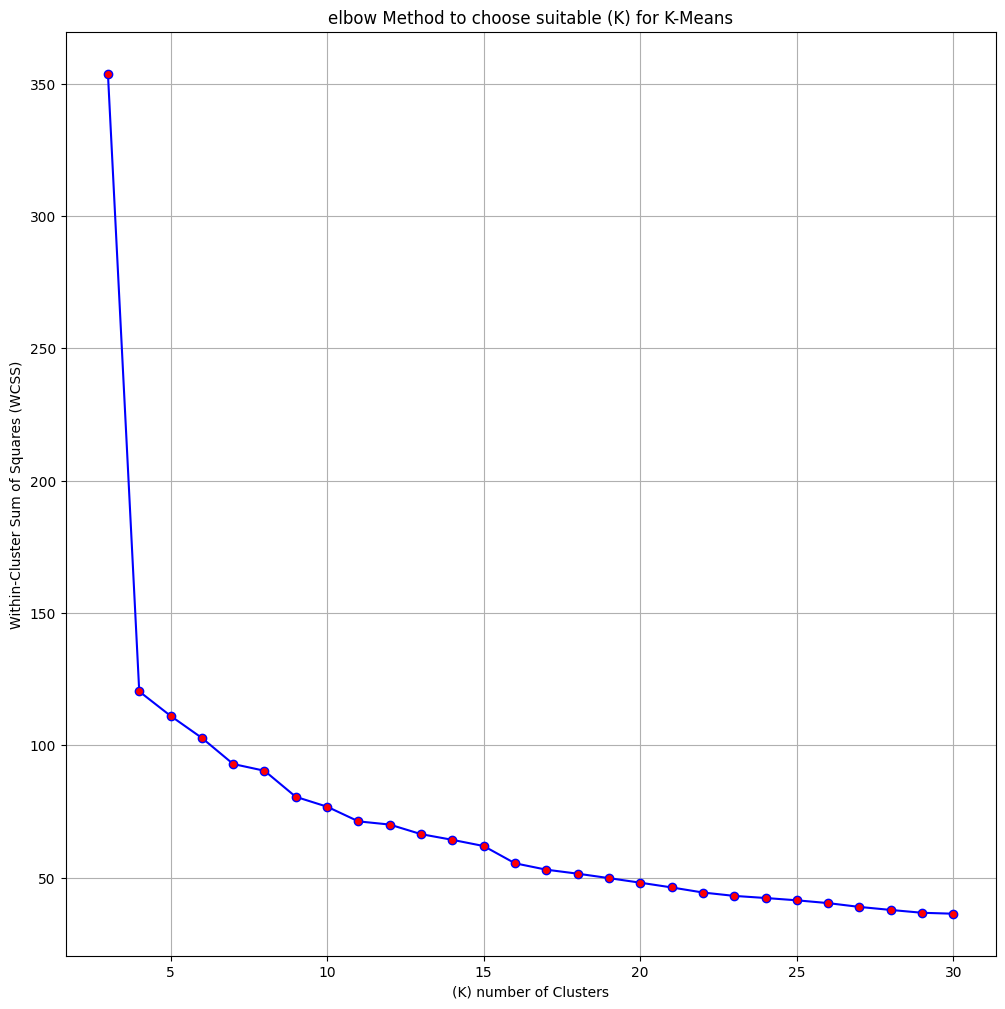

In [214]:
plt.figure(figsize=(12,12))
plt.plot([x for x in range(3,31)],sentroids,marker="o",c="blue",markerfacecolor="red")
plt.title("elbow Method to choose suitable (K) for K-Means")
plt.xlabel("(K) number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()

# Elbow Method to choose the number of Clusters by **`Silhouette Score`**

In [215]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

sentroids = []
for k in range(3,31):
    algo = KMeans(n_clusters=k,random_state=42)
    algo.fit(df[["feature_2","feature_3","feature_4"]])
    sentroids.append(silhouette_score(df,algo.labels_,random_state=42))

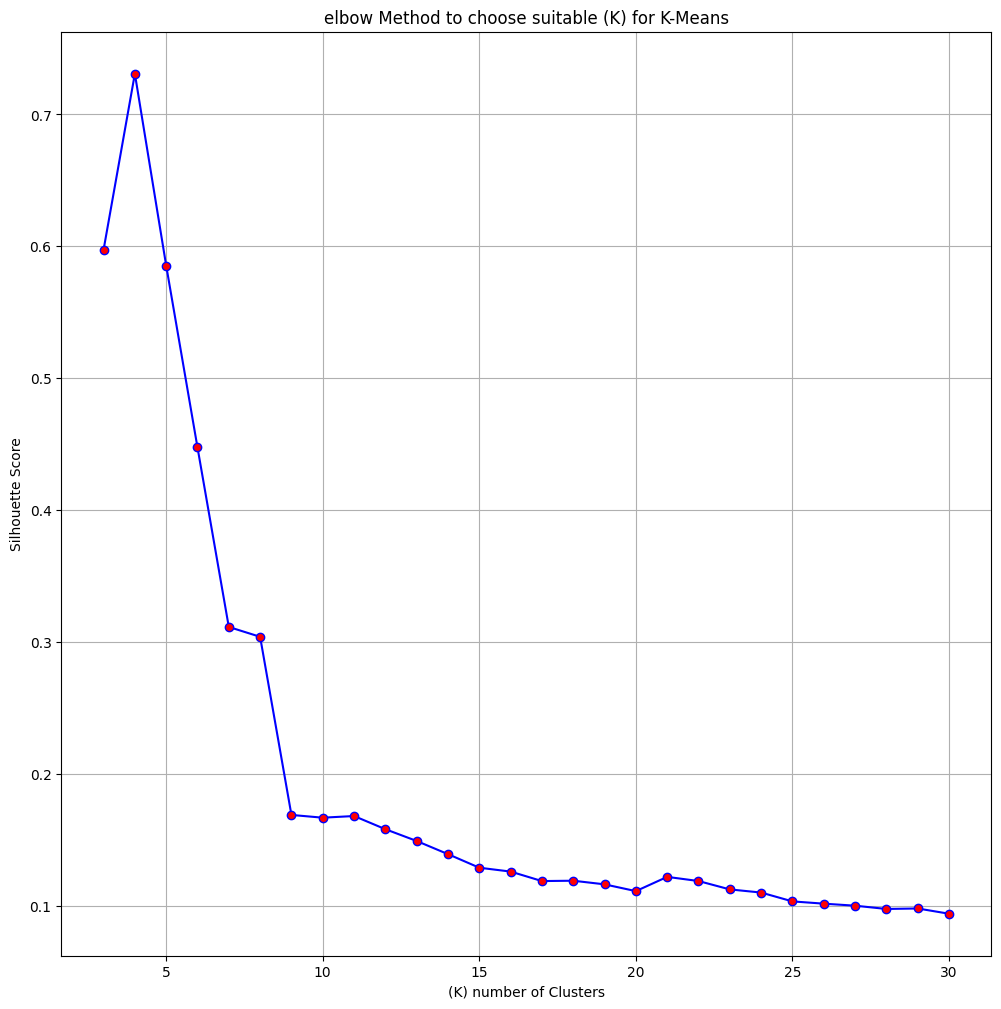

In [216]:
plt.figure(figsize=(12,12))
plt.plot([x for x in range(3,31)],sentroids,marker="o",c="blue",markerfacecolor="red")
plt.title("elbow Method to choose suitable (K) for K-Means")
plt.xlabel("(K) number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()

# Fit data with K-means model 

In [217]:
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters,init="k-means++",random_state=42)
kmeans.fit(df[["feature_2","feature_3","feature_4"]])
labels_ = kmeans.labels_
sentroids = kmeans.cluster_centers_ 

In [218]:
df[["feature_2","feature_3","feature_4"]]

,feature_2,feature_3,feature_4
0,0.277968,0.702952,1.374166
1,0.944749,-1.672147,-0.695038
2,0.742522,-1.416056,-0.820891
3,0.489929,-1.692133,-0.573161
4,0.064361,1.088081,-0.892193
...,...,...,...
495,0.117375,-1.134905,-0.795564
496,0.670800,-1.384047,-0.524277
497,0.422672,-1.461787,-0.579008
498,1.305169,0.567142,1.698487


In [219]:
new_df = pd.concat([df[["feature_2","feature_3","feature_4"]], pd.DataFrame({'cluster':labels_})], axis=1)
new_df.head()

,feature_2,feature_3,feature_4,cluster
0,0.277968,0.702952,1.374166,1
1,0.944749,-1.672147,-0.695038,2
2,0.742522,-1.416056,-0.820891,2
3,0.489929,-1.692133,-0.573161,2
4,0.064361,1.088081,-0.892193,0


In [220]:
from sklearn.decomposition import PCA 

pca_model = PCA(n_components=2,random_state=42)
PCA_data = pca_model.fit_transform(df[["feature_2","feature_3","feature_4"]])
New_sentroid_places = pca_model.transform(sentroids)


C:\Users\Computec\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [221]:
from sklearn.metrics import silhouette_score
silhouette_score(new_df,labels_,random_state=42)

np.float64(0.773135391203723)

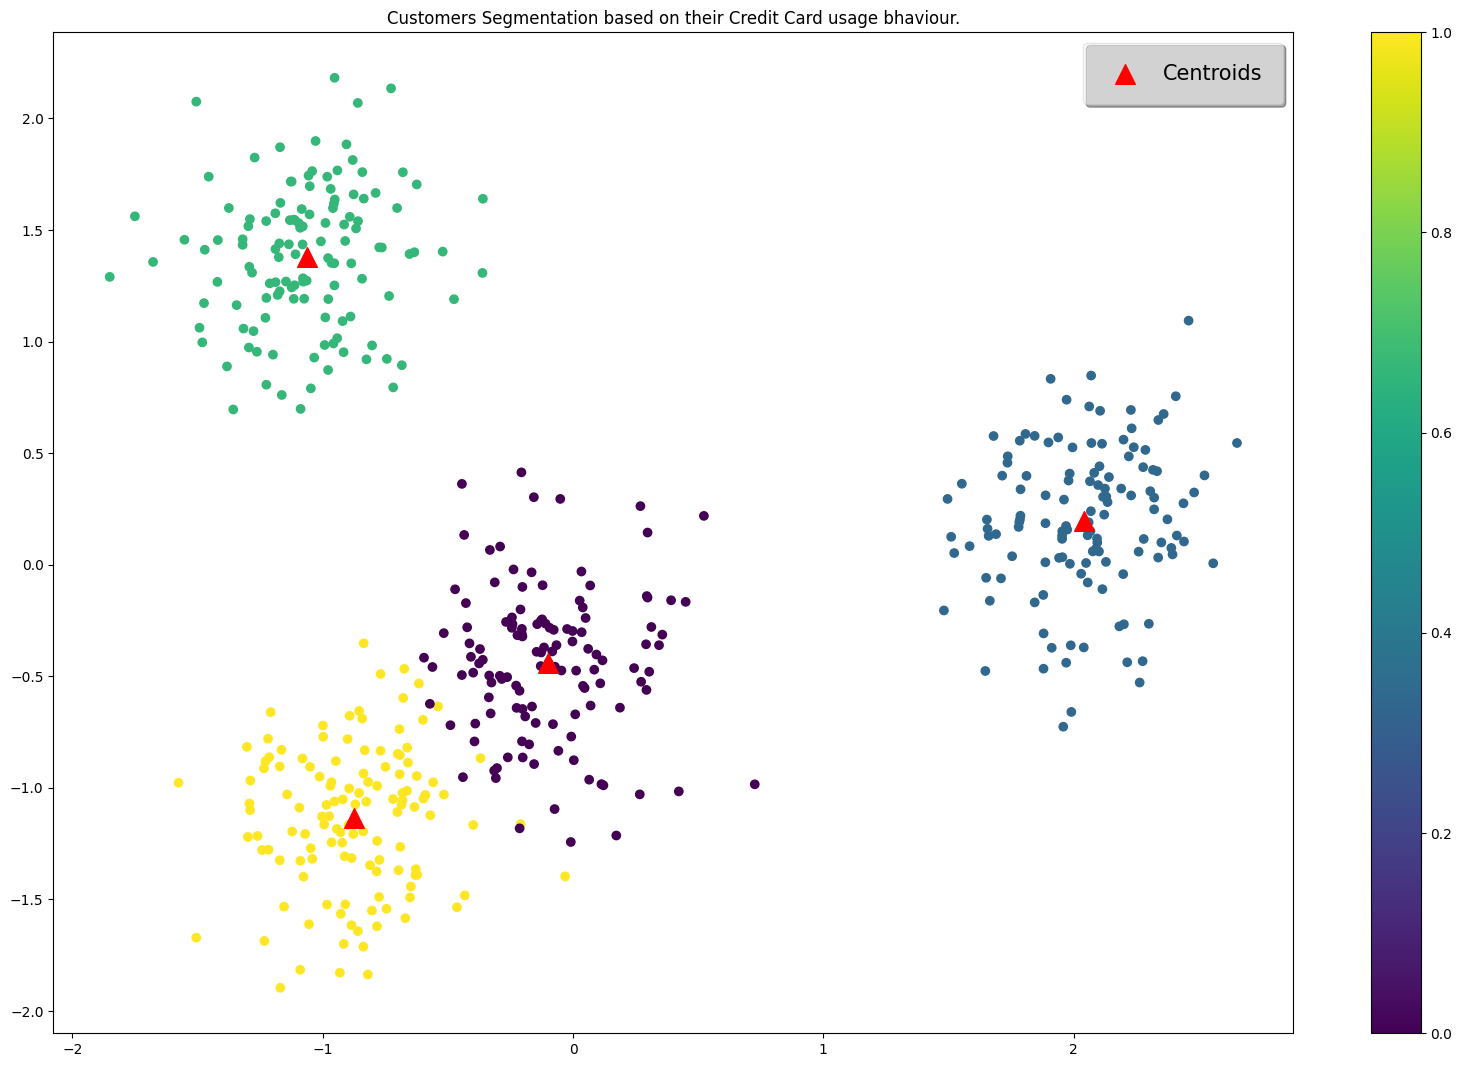

In [222]:
plt.figure(figsize=(20,13))
plt.scatter(PCA_data[:,0], PCA_data[:,1], marker='o',c=labels_)
plt.scatter(New_sentroid_places[:,0], New_sentroid_places[:,1], marker='^',color = "red",s=200,label="Centroids")
plt.legend(frameon=True,ncol=1,fancybox=True,framealpha=0.5,shadow=True,borderpad=1,fontsize=15)
plt.colorbar()
plt.title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

# Classification Model Preperation 

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


## Splitting Data

In [224]:
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [225]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Here is the trick

> - I chose the **Decision Tree Classifier** to measure the features' importance during training 
> - so I noticed that the first two features, his importance is equal to **0** 
> - then I deleted these two features and passed them to the **SVM classifier** to minimise **`C`** value, which refers to the generalization value

## Before making these steps, all models are offered data with **`accuracy 100%`**

In [226]:
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(x_train,y_train)
print(*dt.feature_importances_)

0.3330170986259811 0.3167226834683556 0.3502602179056633


### As we see, there is overfitting in this model

In [227]:
y_predction = dt.predict(x_test)

In [228]:
traning_acc = dt.score(x_train,y_train)
print(f"DescionTree Model Training Accurecy = {traning_acc *100}%")

DescionTree Model Training Accurecy = 100.0%


In [229]:
training_acc = accuracy_score(y_pred=y_predction,y_true=y_test)
print(f"DescionTree Model Accurecy = {training_acc *100}%")


DescionTree Model Accurecy = 98.66666666666667%


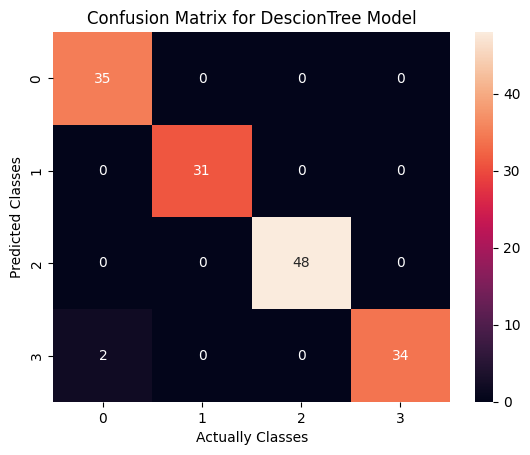

In [230]:
sns.heatmap(data=confusion_matrix(y_pred=y_predction,y_true=y_test),annot=True)
plt.title("Confusion Matrix for DescionTree Model")
plt.xlabel("Actually Classes")
plt.ylabel("Predicted Classes")
plt.show()

## ✅ Here we use Support Vector Machine 

In [231]:
svc = SVC(C = 0.01)
svc.fit(x_train,y_train)

SVC(C=0.01)

In [232]:
y_predction = svc.predict(x_test)

In [233]:
training_acc = svc.score(x_train,y_train)
print(f"SVM Model Training Accurecy = {training_acc * 100:.02f} %")

SVM Model Training Accurecy = 96.00 %


In [234]:
model_acc = accuracy_score(y_pred=y_predction,y_true=y_test)
print(f"SVM Model Accurecy = {model_acc * 100:.02f} %")


SVM Model Accurecy = 94.67 %


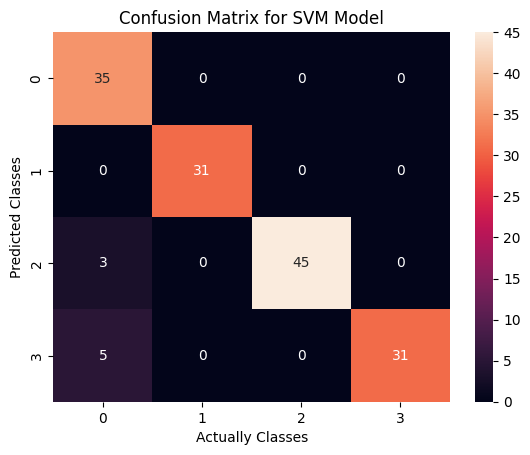

In [235]:
sns.heatmap(confusion_matrix(y_pred=y_predction,y_true=y_test),annot=True)
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Actually Classes")
plt.ylabel("Predicted Classes")
plt.show()

In [236]:
print(classification_report(y_pred=y_predction,y_true=y_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        35
           1       1.00      1.00      1.00        31
           2       1.00      0.94      0.97        48
           3       1.00      0.86      0.93        36

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150

